In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


df = pd.read_csv('/content/education_unemployment.csv')


df.head()


,Country,Average_Years_of_Schooling,Unemployment_Rate,Region
0,Jordan,11.0,23.9,Middle East
1,Germany,13.2,3.1,Europe
2,USA,13.4,4.0,North America
3,India,6.7,7.5,Asia
4,Brazil,8.2,12.4,South America


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     8 non-null      object 
 1   Average_Years_of_Schooling  8 non-null      float64
 2   Unemployment_Rate           8 non-null      float64
 3   Region                      8 non-null      object 
dtypes: float64(2), object(2)
memory usage: 388.0+ bytes


In [4]:
df.describe()

,Average_Years_of_Schooling,Unemployment_Rate
count,8.000000,8.000000
mean,10.137500,12.162500
std,2.747434,11.226364
min,6.700000,2.600000
25%,7.900000,3.775000
50%,10.050000,8.650000
75%,12.675000,15.275000
max,13.400000,34.000000


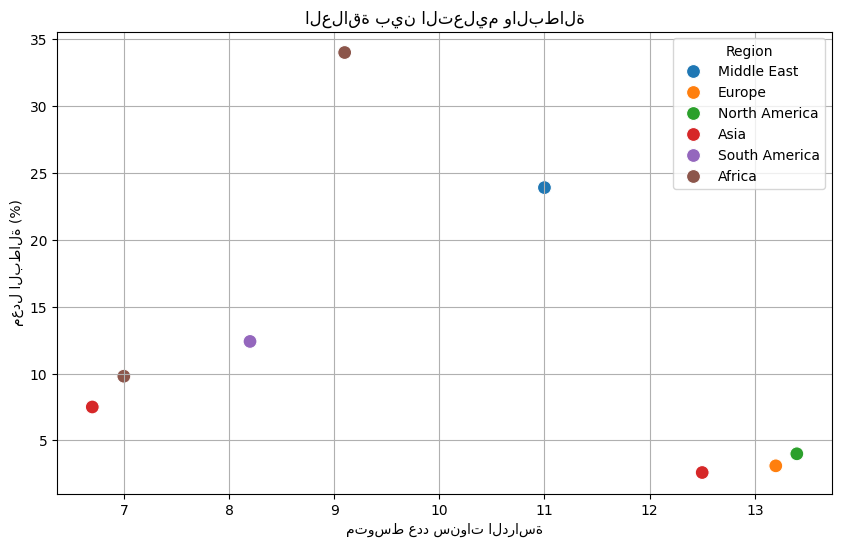

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Average_Years_of_Schooling', y='Unemployment_Rate', hue='Region', s=100)
plt.title("العلاقة بين التعليم والبطالة")
plt.xlabel("متوسط عدد سنوات الدراسة")
plt.ylabel("معدل البطالة (%)")
plt.grid(True)
plt.show()

In [7]:
# أعلى 3 دول تعليمًا
print(" أعلى 3 دول تعليمًا:")
print(df.sort_values('Average_Years_of_Schooling', ascending=False)[['Country', 'Average_Years_of_Schooling']].head(3))

# أعلى 3 دول بطالة
print("\n أعلى 3 دول بطالة:")
print(df.sort_values('Unemployment_Rate', ascending=False)[['Country', 'Unemployment_Rate']].head(3))


 أعلى 3 دول تعليمًا:
   Country  Average_Years_of_Schooling
2      USA                        13.4
1  Germany                        13.2
6    Japan                        12.5

 أعلى 3 دول بطالة:
        Country  Unemployment_Rate
7  South Africa               34.0
0        Jordan               23.9
4        Brazil               12.4


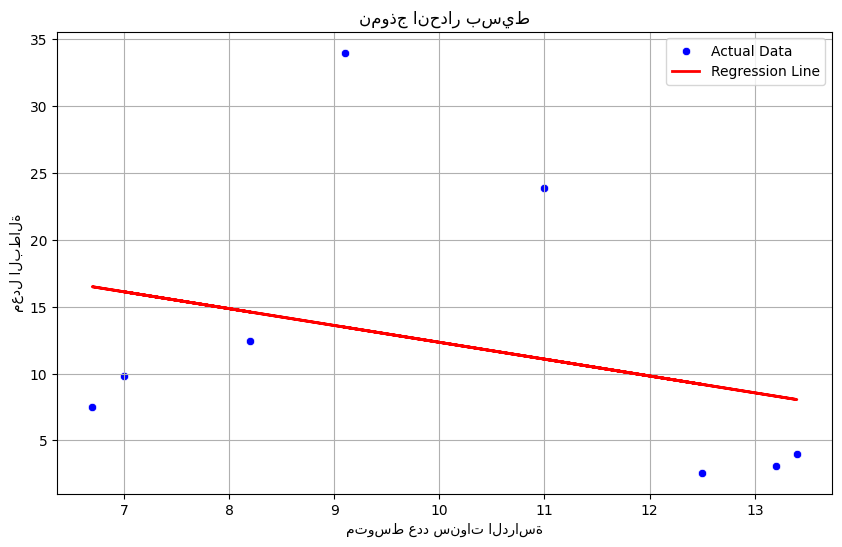

🔍 معامل الانحدار (coefficient): -1.259090156371981
📉 درجة التناسب R²: 0.09494889361706771


In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np

# تحضير البيانات للنموذج
X = df[['Average_Years_of_Schooling']]
y = df['Unemployment_Rate']

model = LinearRegression()
model.fit(X, y)


plt.figure(figsize=(10,6))
sns.scatterplot(x=X.squeeze(), y=y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')
plt.xlabel("متوسط عدد سنوات الدراسة")
plt.ylabel("معدل البطالة")
plt.title("نموذج انحدار بسيط")
plt.legend()
plt.grid(True)
plt.show()

# تقييم النموذج
print("🔍 معامل الانحدار (coefficient):", model.coef_[0])
print("📉 درجة التناسب R²:", model.score(X, y))


In [9]:
model.predict([[8]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.85380521])

In [12]:
r2_score = model.score(X, y)
print("R-squared Score:", r2_score)

R-squared Score: 0.09494889361706771


In [13]:
y_pred = model.predict(X)
comparison = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(comparison.head())


   Actual  Predicted
0    23.9  11.076535
1     3.1   8.306536
2     4.0   8.054718
3     7.5  16.490622
4    12.4  14.601987


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 8.338664805658725
Root Mean Squared Error: 9.990326920071658
